In [20]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_emotion = pd.read_csv('/content/drive/MyDrive/Université de Lorraine/First semester/Supervised project/Datasets/Datasets_syntax/Emotion.csv')
df_FOB_NLC = pd.read_csv('/content/drive/MyDrive/Université de Lorraine/First semester/Supervised project/Datasets/Datasets_syntax/FOB_NLC.csv')
df_F_SB = pd.read_csv('/content/drive/MyDrive/Université de Lorraine/First semester/Supervised project/Datasets/Datasets_syntax/F_SB.csv')
df_intention = pd.read_csv('/content/drive/MyDrive/Université de Lorraine/First semester/Supervised project/Datasets/Datasets_syntax/Intention.csv')
df_intention_desire = pd.read_csv('/content/drive/MyDrive/Université de Lorraine/First semester/Supervised project/Datasets/Datasets_syntax/Intention_desire.csv')

In [12]:
df = pd.concat([df_FOB_NLC, df_F_SB, df_intention, df_intention_desire, df_emotion], ignore_index = True)

In [13]:
df.shape[0]

250

In [16]:
nlp = spacy.load('en_core_web_sm')

def calculate_average_tree_depth(text):
    """
    Calculate the average depth of the syntactic trees of all sentences in a given text.
    """
    doc = nlp(text)
    depths = []

    for sent in doc.sents:
        def node_depth(node):
            if not list(node.children):
                return 0
            else:
                return 1 + max(node_depth(child) for child in node.children)

        root = sent.root
        depth = node_depth(root)
        depths.append(depth)

    if depths:
        return sum(depths) / len(depths)
    else:
        return 0

def add_syntax_complexity_columns(df):
    """
    Add columns for the average syntactic complexity of the 'Story' and 'Question / Hypothesis' text.

    Parameters:
    - df (DataFrame): The DataFrame to be processed.

    Returns:
    - DataFrame: The modified DataFrame with new columns.
    """
    df['Avg_syntax_complex_story'] = df['Story'].apply(calculate_average_tree_depth)
    df['Avg_syntax_complex_question'] = df['Question_Hypothesis'].apply(calculate_average_tree_depth)

    return df

In [45]:
df_syntax = add_syntax_complexity_columns(df)

In [19]:
df_syntax.to_csv('Dataset_complete_syntaxData.csv')

Index(['Task', 'ATOMS_state', 'Story', 'Question_Hypothesis', 'Answer',
       'Model_Output', 'Normalized_Answer', 'Normalized_Model_Output',
       'Cosine_Similarity', 'Correct_Answer', 'Predicted',
       'Avg_syntax_complex_story', 'Avg_syntax_complex_question',
       'Story_Complexity_Level', 'Question_Complexity_Level'],
      dtype='object')
      Task       ATOMS_state  \
150  Infer  Intention/Desire   
151  Infer  Intention/Desire   
152  Infer  Intention/Desire   
153  Infer  Intention/Desire   
154  Infer  Intention/Desire   

                                                 Story  \
150  You are going to read a fragment of a conversa...   
151  You are going to read a fragment of a conversa...   
152  You are going to read a fragment of a conversa...   
153  You are going to read a fragment of a conversa...   
154  You are going to read a fragment of a conversa...   

                                   Question_Hypothesis Answer Model_Output  \
150                        

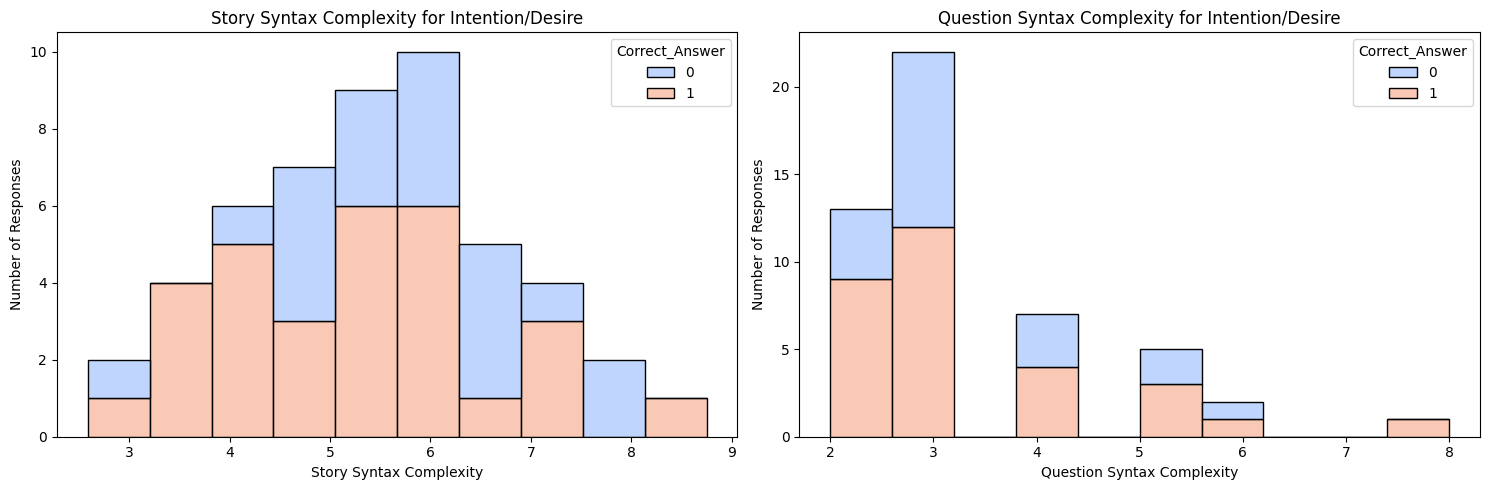

In [48]:
df.rename(columns={'accuracy': 'Correct_Answer'}, inplace=True)

print(df.columns)

subset = df[df['ATOMS_state'] == 'Intention/Desire']

print(subset.head())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(data=subset, x='Avg_syntax_complex_story', hue='Correct_Answer', multiple='stack', bins=10, palette='coolwarm', ax=axes[0])
axes[0].set_title('Story Syntax Complexity for Intention/Desire')
axes[0].set_xlabel('Story Syntax Complexity')
axes[0].set_ylabel('Number of Responses')

sns.histplot(data=subset, x='Avg_syntax_complex_question', hue='Correct_Answer', multiple='stack', bins=10, palette='coolwarm', ax=axes[1])
axes[1].set_title('Question Syntax Complexity for Intention/Desire')
axes[1].set_xlabel('Question Syntax Complexity')
axes[1].set_ylabel('Number of Responses')

plt.tight_layout()
plt.savefig('complexity_vs_accuracy_intention_desire.jpg')
plt.show()

In [35]:
accuracy_percentage = df['accuracy'].mean() * 100
print(accuracy_percentage)

48.4


In [36]:

accuracy_by_state = df.groupby('ATOMS_state')['accuracy'].mean() * 100

print('Accuracy by ATOMS_state:')
print(accuracy_by_state)

accuracy_by_state_df = accuracy_by_state.reset_index()
accuracy_by_state_df.columns = ['ATOMS_state', 'Accuracy_Percentage']
print('\nAccuracy by ATOMS_state (Detailed):')
print(accuracy_by_state_df)

Accuracy by ATOMS_state:
ATOMS_state
Emotion                                     52.0
First Order Belief / NLC                    64.0
First Order Belief / Second Order Belief    32.0
Intention                                   34.0
Intention/Desire                            60.0
Name: accuracy, dtype: float64

Accuracy by ATOMS_state (Detailed):
                                ATOMS_state  Accuracy_Percentage
0                                   Emotion                 52.0
1                  First Order Belief / NLC                 64.0
2  First Order Belief / Second Order Belief                 32.0
3                                 Intention                 34.0
4                          Intention/Desire                 60.0
